In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [2]:
images_dir = os.listdir("Flicker8k_Dataset/")

images_path = 'Flicker8k_Dataset/'
captions_path = 'Flickr8k.token.txt'
train_path = 'Flickr_8k.trainImages.txt'
val_path = 'Flickr_8k.devImages.txt'
test_path = 'Flickr_8k.testImages.txt'

captions = open(captions_path, 'r').read().split("\n")
x_train = open(train_path, 'r').read().split("\n")
x_val = open(val_path, 'r').read().split("\n")
x_test = open(test_path, 'r').read().split("\n")


print (len(captions))
print (len(x_train))
print (len(x_val))
print (len(x_test))

40461
6001
1001
1001


In [3]:
print (captions[0])
print (x_train[0])
print (x_val[0])
print (x_test[0])

1000268201_693b08cb0e.jpg#0	A child in a pink dress is climbing up a set of stairs in an entry way .
2513260012_03d33305cf.jpg
2090545563_a4e66ec76b.jpg
3385593926_d3e9c21170.jpg


In [4]:
temp = captions[0].split('#')
print (temp)
print (temp[0])
print (temp[1])
print (temp[1][2:])

['1000268201_693b08cb0e.jpg', '0\tA child in a pink dress is climbing up a set of stairs in an entry way .']
1000268201_693b08cb0e.jpg
0	A child in a pink dress is climbing up a set of stairs in an entry way .
A child in a pink dress is climbing up a set of stairs in an entry way .


In [0]:
#creating a dictionary for all images and respective descriptions
tokens = {}
for ix in range(len(captions)-1):
    temp = captions[ix].split("#")
    if temp[0] in tokens:
        tokens[temp[0]].append(temp[1][2:])
    else:
        tokens[temp[0]] = [temp[1][2:]]

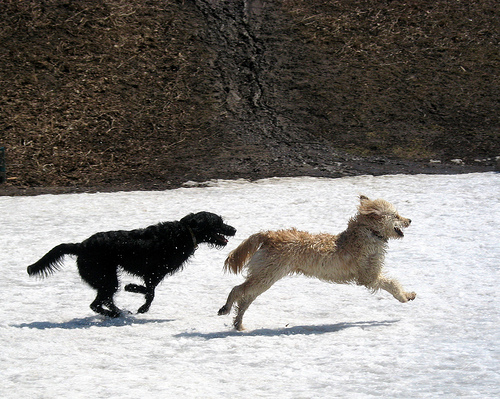

2513260012_03d33305cf.jpg
A black dog is running after a white dog in the snow .
Black dog chasing brown dog through snow
Two dogs chase each other across the snowy ground .
Two dogs play together in the snow .
Two dogs running through a low lying body of water .


In [6]:
# 0th image of train dataset
temp = x_train[0].split("#")
from IPython.display import Image, display
z = Image(filename=images_path+temp[0])
display(z)

print (temp[0])
for ix in range(len(tokens[temp[0]])):
    print (tokens[temp[0]][ix])

In [7]:
train_dataset = open('flickr_8k_train_dataset.txt','w')
train_dataset.write("image_id\tcaptions\n")

val_dataset = open('flickr_8k_val_dataset.txt','w')
val_dataset.write("image_id\tcaptions\n")

test_dataset = open('flickr_8k_test_dataset.txt','w')
test_dataset.write("image_id\tcaptions\n")

18

In [8]:
img = x_train[0]
print (img)
print (tokens[img])

2513260012_03d33305cf.jpg
['A black dog is running after a white dog in the snow .', 'Black dog chasing brown dog through snow', 'Two dogs chase each other across the snowy ground .', 'Two dogs play together in the snow .', 'Two dogs running through a low lying body of water .']


In [0]:
for img in x_train:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> "+ capt + " <end>"
        train_dataset.write(img+"\t"+caption+"\n")
        train_dataset.flush()
train_dataset.close()

In [0]:
for img in x_test:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> "+ capt + " <end>"
        test_dataset.write(img+"\t"+caption+"\n")
        test_dataset.flush()
test_dataset.close()

In [0]:
for img in x_val:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> "+ capt + " <end>"
        val_dataset.write(img+"\t"+caption+"\n")
        val_dataset.flush()
val_dataset.close()